In [2]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import BatchNormalization
#from tensorflow.keras.layers import Conv2D
#from tensorflow.keras.layers import MaxPooling2D
#from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense
#from tensorflow.keras import backend as K
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [3]:
EPOCHS = 25
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256,256))
image_size = 0
directory_root = '../input/plantvillage-dataset'
width=256
height=256
depth=3


In [4]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (64,64))
            img = img_to_array(image)
            #img=img.flatten()
            #print(img.shape)
            return img
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None


In [5]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir[:1] :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")
        print(f"{directory_root}/{plant_folder}")

        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")

            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list[:200]:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
../input/plantvillage-dataset/color
[INFO] Processing Tomato___Target_Spot ...
[INFO] Processing Tomato___Early_blight ...
[INFO] Processing Apple___healthy ...
[INFO] Processing Tomato___healthy ...
[INFO] Processing Blueberry___healthy ...
[INFO] Processing Grape___healthy ...
[INFO] Processing Peach___healthy ...
[INFO] Processing Corn_(maize)___Common_rust_ ...
[INFO] Processing Cherry_(including_sour)___Powdery_mildew ...
[INFO] Processing Tomato___Leaf_Mold ...
[INFO] Processing Apple___Black_rot ...
[INFO] Processing Squash___Powdery_mildew ...
[INFO] Processing Corn_(maize)___Northern_Leaf_Blight ...
[INFO] Processing Strawberry___Leaf_scorch ...
[INFO] Processing Pepper,_bell___healthy ...
[INFO] Processing Orange___Haunglongbing_(Citrus_greening) ...
[INFO] Processing Potato___Late_blight ...
[INFO] Processing Tomato___Late_blight ...
[INFO] Processing Strawberry___healthy ...
[INFO] Processing Tomato___Tomato_Yellow_Leaf_Curl_Virus ...
[INFO] Proces

In [6]:
image_size = len(image_list)
print(len(image_list))

7552


In [7]:
image_labels = []

for label in label_list:
    if label.split('_')[len(label.split('_'))-1] == 'healthy':
        image_labels.append(0)
    else:
        image_labels.append(1)

In [8]:
np_image_list = np.array(image_list).reshape(np.array(image_list).shape[0], np.array(image_list).shape[1]*np.array(image_list).shape[2]*np.array(image_list).shape[3])
#image_labels = image_labels.flatten()
print(len(image_labels))
print(np_image_list.shape)


7552
(7552, 12288)


In [9]:
print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42)

[INFO] Spliting data to train, test


In [10]:
print(type(x_train))

<class 'numpy.ndarray'>


In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [12]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)


SVC(random_state=0)

In [13]:
y_pred = classifier.predict(x_test)

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[338 141]
 [ 41 991]]
0.8795499669093315


In [15]:
import pickle

filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [16]:
N_TRAIN_SAMPLES = x_train.shape[0]
N_EPOCHS = 25
N_BATCH = 128
N_CLASSES = np.unique(y_train)

In [17]:
scores_train = []
scores_test = []

# EPOCH
epoch = 0
iterations = 100
while epoch < N_EPOCHS:
    print('epoch: ', epoch)
    e_classifier = SVC(kernel='rbf',max_iter=iterations)
    e_classifier.fit(x_train, y_train)

    # SCORE TRAIN
    scores_train.append(classifier.score(x_train, y_train))

    # SCORE TEST
    scores_test.append(classifier.score(x_test, y_test))

    epoch += 1
    iterations = iterations + 50

epoch:  1


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


epoch:  2


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


epoch:  3


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


epoch:  4


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


epoch:  5


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


epoch:  6


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=350).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


epoch:  7


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


epoch:  8


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=450).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


epoch:  9


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


epoch:  10


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=550).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


epoch:  11


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=600).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


epoch:  12


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=650).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


epoch:  13


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


epoch:  14


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=750).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


epoch:  15


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=800).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


epoch:  16


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=850).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


epoch:  17


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=900).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


epoch:  18


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=950).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


epoch:  19


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


epoch:  20


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=1050).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


epoch:  21


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=1100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


epoch:  22


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=1150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


epoch:  23


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=1200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


epoch:  24


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=1250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [18]:
print(scores_train)

[0.9511670253269326, 0.9511670253269326, 0.9511670253269326, 0.9511670253269326, 0.9511670253269326, 0.9511670253269326, 0.9511670253269326, 0.9511670253269326, 0.9511670253269326, 0.9511670253269326, 0.9511670253269326, 0.9511670253269326, 0.9511670253269326, 0.9511670253269326, 0.9511670253269326, 0.9511670253269326, 0.9511670253269326, 0.9511670253269326, 0.9511670253269326, 0.9511670253269326, 0.9511670253269326, 0.9511670253269326, 0.9511670253269326, 0.9511670253269326]


In [19]:
print(scores_test)

[0.8795499669093315, 0.8795499669093315, 0.8795499669093315, 0.8795499669093315, 0.8795499669093315, 0.8795499669093315, 0.8795499669093315, 0.8795499669093315, 0.8795499669093315, 0.8795499669093315, 0.8795499669093315, 0.8795499669093315, 0.8795499669093315, 0.8795499669093315, 0.8795499669093315, 0.8795499669093315, 0.8795499669093315, 0.8795499669093315, 0.8795499669093315, 0.8795499669093315, 0.8795499669093315, 0.8795499669093315, 0.8795499669093315, 0.8795499669093315]


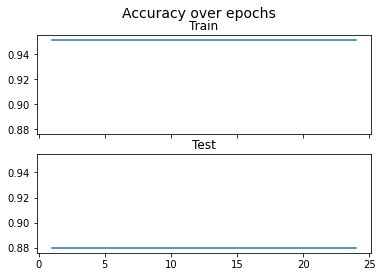

In [46]:
fig, ax = plt.subplots(2, sharex=True, sharey=True)
x_axis = np.arange(1,25,1)
ax[0].plot(x_axis,scores_train)
ax[0].set_title('Train')
ax[1].plot(x_axis,scores_test)
ax[1].set_title('Test')
fig.suptitle("Accuracy over epochs", fontsize=14)
plt.show()

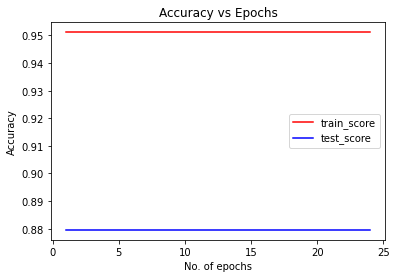

In [47]:

plt.plot(x_axis,scores_train,'r',label='train_score')
plt.plot(x_axis,scores_test,'b',label='test_score')
plt.title("Accuracy vs Epochs")
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()